## John Lehne

## CA04 - Ensemble Methods

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data using URL
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true' 
data = pd.read_csv(url, encoding = "ISO-8859-1")

#making sure data was read correctly
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


## Data Quality Analysis

In [3]:
# Number of total rows and columns
data.shape

(48842, 11)

In [4]:
# Number of non-null values for each column
data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [5]:
# Number of null values for each column
data.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [6]:
# Range, column, number of non-null objects, data type, memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


## Splitting Data and Preparing for Models

In [7]:
# Seperating data into training features and labels 
data_train = data[data.flag == 'train']
# Seperating Features
x_train = data_train.drop(columns = ['flag','y'])
# Seperating Labels
y_train = data_train.y

# Seperating data into testing features and labels
data_test = data[data.flag == 'test']
# Seperating Features
x_test = data_test.drop(columns = ['flag', 'y'])
# Seperating Labels
y_test = data_test.y

In [8]:
# One-hot-encoding variables for Decision Tree to run without error
one_hot_train = pd.get_dummies(x_train, drop_first = True)
one_hot_test = pd.get_dummies(x_test, drop_first = True)

## Random Forest Model

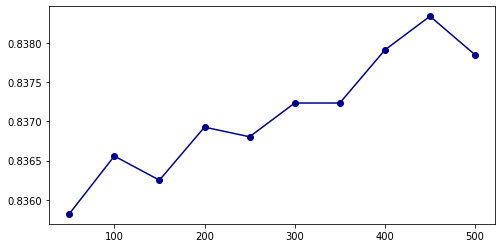

In [9]:
# Importing packages from sklearn 
from sklearn.ensemble import RandomForestClassifier

# Creating variable results to append random forest results to for plotting
results = []
# Defining the options for the estimator values
estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# Creating Random Forest model using for loop to iterate through estimator_options
for estimator in estimator_options:
  forest = RandomForestClassifier(n_estimators = estimator, random_state = 19)
  forest.fit(one_hot_train, y_train)
  y_pred = forest.predict(one_hot_test)
  # Calculating accuracy 
  accuracy = np.mean(y_test == y_pred)
  # Appending results with the accuracy values
  results.append(accuracy)

# Creating plot to visualize the accuracy for the estimators 
plt.figure(figsize=(8,4))
pd.Series(results, estimator_options).plot(color = "darkblue", marker = "o")

Looking at the above visualization, one can see that there is a steady increase in accuracy as the n_estimators increases.  At 500, there is a decline.

The decline at 500 would suggest that 450 is the optimal n_estimator value. The high accuracy compared to the other estimators would support this argument.  

## AdaBoost Model

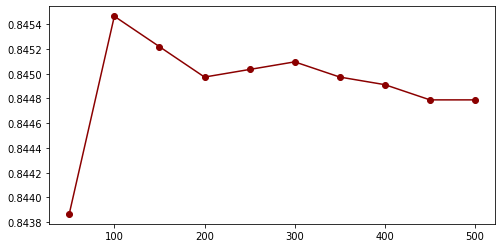

In [10]:
# Importing packages from sklearn 
from sklearn.ensemble import AdaBoostClassifier

# Creating variable results to append AdaBoost results to for plotting
results = []
# Defining the options for the estimator values
estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# Creating AdaBoost model using for loop to iterate through estimator_options
for estimator in estimator_options:
  aboost = AdaBoostClassifier(n_estimators = estimator, random_state = 19)
  aboost.fit(one_hot_train, y_train)
  y_pred = aboost.predict(one_hot_test)
  # Calculating accuracy 
  accuracy = np.mean(y_test == y_pred)
  # Appending results with the accuracy values
  results.append(accuracy)

# Creating plot to visualize the accuracy for the estimators 
plt.figure(figsize=(8,4))
pd.Series(results, estimator_options).plot(color = "darkred", marker = "o")

Looking at the above visualization, one can see that there is a significant increase followed by a gradual decrease in accuracy as the n_estimators increases. After 100, the decline begins.

The decline after 100 would suggest that 100 is the optimal n_estimator value for this model. The high accuracy compared to the other estimators would support this argument.

## Gradient Boost Model

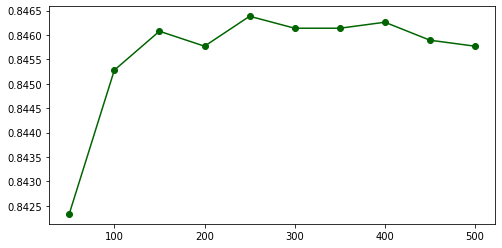

In [11]:
# Importing packages from sklearn 
from sklearn.ensemble import GradientBoostingClassifier

# Creating variable results to append Gradient Boost results to for plotting
results = []
# Defining the options for the estimator values
estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# Creating Gradient Boost model using for loop to iterate through estimator_options
for estimator in estimator_options:
  gboost = GradientBoostingClassifier(n_estimators = estimator, random_state = 19)
  gboost.fit(one_hot_train, y_train)
  y_pred = gboost.predict(one_hot_test)
  # Calculating accuracy 
  accuracy = np.mean(y_test == y_pred)
  # Appending results with the accuracy values
  results.append(accuracy)

# Creating plot to visualize the accuracy for the estimators 
plt.figure(figsize=(8,4))
pd.Series(results, estimator_options).plot(color = "darkgreen", marker = "o")

Looking at the above visualization, one can see that the value with the highest accuracy is 250. After 250, the accuracy decreases as the estimators increases.

The decline after 250 would suggest that 250 is the optimal n_estimator value for this model. The high accuracy compared to the other estimators would support this argument.

## Extreme Gradient Boost Model

In [12]:
# Installing XGBoost and importing packages  
!pip install xgboost

from sklearn import datasets
import xgboost as xgb

In [13]:
# Renaming columns to remove '<' and '>' symbols that will throw error in XGB
new_one_hot_test = one_hot_test.rename(columns = {'capital_gl_bin_b. < 0': 'capital_gl_bin_b. less than 0',
                                                  'capital_gl_bin_c. > 0': 'capital_gl_bin_c. greater than 0'})
new_one_hot_train = one_hot_train.rename(columns = {'capital_gl_bin_b. < 0': 'capital_gl_bin_b. less than 0',
                                                    'capital_gl_bin_c. > 0': 'capital_gl_bin_c. greater than 0'})

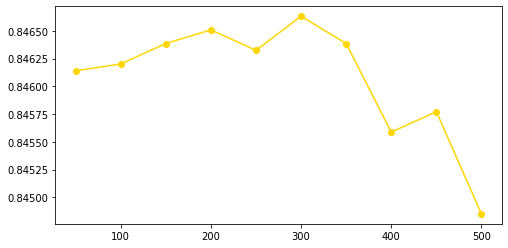

In [14]:
# Creating variable results to append XGBoost results to for plotting
results = []
# Defining the options for the estimator values
estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# Creating XGBoost model using for loop to iterate through estimator_options
for estimator in estimator_options:
  xboost = xgb.XGBClassifier(n_estimators = estimator, learning_rate = 0.3, max_depth = 3, 
                             objective = 'multi:softprob', num_class = 3, random_state = 19)
  xboost.fit(new_one_hot_train, y_train)
  y_pred = xboost.predict(new_one_hot_test)
  # Calculating accuracy 
  accuracy = np.mean(y_test == y_pred)
  # Appending results with the accuracy values
  results.append(accuracy)

# Creating plot to visualize the accuracy for the estimators 
plt.figure(figsize=(8,4))
pd.Series(results, estimator_options).plot(color = "gold", marker = "o")

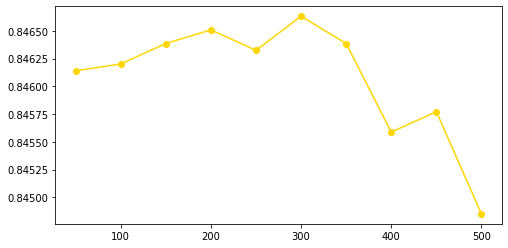

In [15]:
# Alternative Method of XGB (returns identical results as above)

# Reformatting training and testing data for xgb
d_train = xgb.DMatrix(new_one_hot_train, label = y_train)
d_test = xgb.DMatrix(new_one_hot_test, label = y_test)

# Creating variable results to append XGBoost results to for plotting
results = []
# Defining the options for the estimator values
estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# Creating XGBoost model using for loop to iterate through estimator_options
for estimator in estimator_options:
  params = {
      'eta' : 0.3,
      'max_depth' : 3,
      'objective' : 'multi:softprob',
      'num_class' : 3,
      'random_state' : 19
      }
  steps = estimator # number of training iterations 
  xboost = xgb.train(params, d_train, steps)
  pred = xboost.predict(d_test)
  y_pred = np.asarray([np.argmax(line) for line in pred])
  # Calculating accuracy 
  accuracy = np.mean(y_test == y_pred)
  # Appending results with the accuracy values
  results.append(accuracy)

# Creating plot to visualize the accuracy for the estimators 
plt.figure(figsize=(8,4))
pd.Series(results, estimator_options).plot(color = "gold", marker = "o")

Looking at the above visualization, one can see that the value with the highest accuracy is 300. After 300, the accuracy decreases as the estimators increases.

The decline after 300 would suggest that 300 is the optimal n_estimator value for this model. The high accuracy compared to the other estimators would support this argument.



## Evaluating Models with Performance Metrics

In [28]:
# Building blank dataframe to put final data for performance metrics
perf_metrics = pd.DataFrame(columns = ['RandomForest', 'AdaBoost', 'GradientBoost', 'XGB'],
                            index = ['Accuracy', 'AUC'])

# importing package to calculate AUC score
from sklearn.metrics import roc_auc_score

# Running the various models

# Random Forest
# Building random forest with the common hyper-params
forest = RandomForestClassifier(n_estimators = 100, max_depth = 3, min_samples_split = 2,
                                min_samples_leaf = 1, random_state = 19)
forest.fit(one_hot_train, y_train)
y_pred = forest.predict(one_hot_test)
# Calculating accuracy 
rf_acc = np.mean(y_test == y_pred)
# Calcularing AUC
rf_auc = roc_auc_score(y_test, y_pred)

# AdaBoost
# Building adaboost with common hyper-params
aboost = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.3, random_state = 19) # AdaBoost has fewest common hyper-params
aboost.fit(one_hot_train, y_train)
y_pred = aboost.predict(one_hot_test)
# Calculating accuracy 
aboost_acc = np.mean(y_test == y_pred)
# Calculating AUC
aboost_auc = roc_auc_score(y_test, y_pred)

# GradientBoost
# Building gradient boosting with common hyper-params
gboost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.3, min_samples_split = 2, 
                                    min_samples_leaf = 1, max_depth = 3, random_state = 19)
gboost.fit(one_hot_train, y_train)
y_pred = gboost.predict(one_hot_test)
# Calculating accuracy 
gboost_acc = np.mean(y_test == y_pred)
# Calculating AUC
gboost_auc = roc_auc_score(y_test, y_pred)

# Extreme Gradient Boosting (XGB)
# Building xgb with common hyper-params
xboost = xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.3, max_depth = 3, 
                             objective = 'multi:softprob', num_class = 3, random_state = 19) #additional hyper-params used in XGB
xboost.fit(new_one_hot_train, y_train) #must use new_one_hot_train/test from earlier in code
y_pred = xboost.predict(new_one_hot_test)
# Calculating accuracy 
xgb_acc = np.mean(y_test == y_pred)
# Calculating AUC
xgb_auc = roc_auc_score(y_test, y_pred)

# Populating accuracy and auc values to performance metrics table
perf_metrics.loc['Accuracy'] = pd.Series({'RandomForest':rf_acc, 'AdaBoost':aboost_acc, 
                                          'GradientBoost':gboost_acc, 'XGB':xgb_acc})
perf_metrics.loc['AUC'] = pd.Series({'RandomForest':rf_auc, 'AdaBoost':aboost_auc,
                                     'GradientBoost':gboost_auc, 'XGB':xgb_auc})

# Displaying final performance metrics for the models
print(perf_metrics)
# Printing the common hyper parameters used in the models
print('Common Hyper-Parameters:')
print('n_estimator:', 100)
print('max_depth:', 3)
print('min_samples_split:', 2)
print('min_samples_leaf:', 1)
print('eta (learning_rate):', 0.3)
print('random_state:', 19)

         RandomForest  AdaBoost GradientBoost       XGB
Accuracy     0.809225  0.841963      0.846815  0.846201
AUC           0.61093  0.729791       0.75793  0.757528
Common Hyper-Parameters:
n_estimator: 100
max_depth: 3
min_samples_split: 2
min_samples_leaf: 1
eta (learning_rate): 0.3
random_state: 19


As shown in the table above, GradientBoost has the best performance metrics across the models given the hyper-parameters that were set.  XGB is nearly identical in performance to GradientBoost, with just marginally lower scores. 